# Data Analyst at Dhruv Research

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

1. Load the dataset into a pandas dataframe. Name the variable as “survey”.

In [2]:
survey = pd.read_excel("Sample Survey.xlsx", sheet_name = "Data")
survey.head()

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
0,1,2020-08-24,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969
1,2,2020-08-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419
2,3,2020-08-24,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,Male,191,Gen,0.673762
3,4,2020-08-24,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,Male,194,Gen,1.101298
4,5,2020-08-24,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505


2. How many samples were collected on each day?

In [3]:
survey['collection_date'].value_counts()

2020-08-24    1479
2020-08-25     998
2020-08-28     761
2020-08-27     665
2020-08-29     620
2020-09-01     607
2020-08-26     598
2020-08-30     582
2020-08-31     557
Name: collection_date, dtype: int64

3. What proportion of the total respondents were aged less than 45?

In [4]:
survey['age'].value_counts()

25      598
24      449
30      440
28      396
22      392
26      389
27      360
20      328
23      317
21      311
35      263
32      263
29      239
40      177
34      173
19      171
31      159
33      143
38      135
36      127
18      125
42      104
37       90
45       82
43       72
39       69
50       60
41       54
44       54
48       35
47       34
46       32
49       27
52       24
51       23
55       20
60       15
53       12
61       12
54       11
57       10
56        9
58        9
64        8
67        7
65        5
62        5
59        5
63        4
66        4
68        4
70        3
71        2
99        1
69        1
72        1
74        1
75        1
76        1
24ko      1
Name: age, dtype: int64

In [5]:
# 24ko will be 24. So we have to change it to 24 first
survey['age']=survey['age'].replace('24ko',24)
# check
survey['age'].value_counts()

25    598
24    450
30    440
28    396
22    392
26    389
27    360
20    328
23    317
21    311
35    263
32    263
29    239
40    177
34    173
19    171
31    159
33    143
38    135
36    127
18    125
42    104
37     90
45     82
43     72
39     69
50     60
41     54
44     54
48     35
47     34
46     32
49     27
52     24
51     23
55     20
60     15
61     12
53     12
54     11
57     10
58      9
56      9
64      8
67      7
62      5
59      5
65      5
68      4
63      4
66      4
70      3
71      2
72      1
76      1
75      1
69      1
74      1
99      1
Name: age, dtype: int64

In [6]:
# proportion 
round(len(survey[survey['age']<45])/len(survey['age']),4)

0.9318

The proportion of the total respondents aged less than 45 is around 93%

4. Create a new column in the dataframe “age_group”. This column should contain the age
group the respondent belongs to. The age groups are 18-25, 25-40, 40-55 and 55+

In [7]:
conditions =[(survey['age']>=18) & (survey['age']<25),
            (survey['age']>=25) & (survey['age']<40),
            (survey['age']>=40) & (survey['age']<55),
            (survey['age']>=55)]

values = ['18-25', '25-40', '40-55', '55+']
survey['age_group'] = np.select(conditions, values)

In [8]:
#check
survey.head()

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight,age_group
0,1,2020-08-24,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969,25-40
1,2,2020-08-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419,25-40
2,3,2020-08-24,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,Male,191,Gen,0.673762,25-40
3,4,2020-08-24,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,Male,194,Gen,1.101298,25-40
4,5,2020-08-24,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505,18-25


5. How many samples were collected for each age-group? Which age-group had the most samples?

In [9]:
survey['age_group'].value_counts()

25-40    3844
18-25    2094
40-55     801
55+       128
Name: age_group, dtype: int64

25-40 age-group has maximum sample.

6. What proportion of the respondents had opted for the RJD party in both the Vote_Now and the Past_Vote questions?

In [10]:
survey['Vote_Now'].value_counts()

BJP           2367
RJD           1996
JD(U)          526
NOTA           458
JAP(L)         313
Plurals        217
INC            216
Undecided      164
RJJP           142
LJP            102
Others          87
RLSP            82
Left Front      79
AIMIM           37
VIP             28
AAP             27
BSP             15
HAM             11
Name: Vote_Now, dtype: int64

In [11]:
survey['Past_Vote'].value_counts()

BJP             2823
JD(U)           1374
RJD             1047
Did not vote     804
INC              213
NOTA             167
Others           132
LJP              125
HAM               50
RLSP              49
JAP(L)            42
Left Front        30
BSP                9
VIP                2
Name: Past_Vote, dtype: int64

In [12]:
# RJD proportion in Vote_Now
round(len(survey[survey['Vote_Now']=='RJD'])/len(survey['Vote_Now']),4)

0.2907

 The proportion of the respondents opted for the RJD party in the Vote_Now is around 29%

In [13]:
# RJD proportion in Past_Vote questions
round(len(survey[survey['Past_Vote']=='RJD'])/len(survey['Past_Vote']),4)

0.1525

 The proportion of the respondents opted for the RJD party in the Past_Vote is around 15%

In [14]:
# for together
round(len(survey[(survey['Vote_Now']=='RJD')  & (survey['Past_Vote']=='RJD')])/len(survey),4)

0.1181

The proportion of the respondents opted for the RJD party in both the Vote_Now and the Past_Vote questions is around 11.8%

7. For each day of sample collection, determine the proportion of respondents who were fully satisfied with the performance of the CM. So if there were a total of 1000 samples on day 1 and 300 out of those said they were fully satisfied, then our answer for that day would be 0.3.

In [15]:
survey.groupby(by='collection_date')['CM_satisfaction'].apply(lambda fs:np.sum(fs=='Fully Satisfied')/len(fs))

collection_date
2020-08-24    0.098715
2020-08-25    0.095190
2020-08-26    0.098662
2020-08-27    0.081203
2020-08-28    0.120894
2020-08-29    0.117742
2020-08-30    0.111684
2020-08-31    0.111311
2020-09-01    0.123558
Name: CM_satisfaction, dtype: float64

8. In a similar fashion create a day-wise proportion of respondents that opted fully
dissatisfied with their MLA. Create a line plot of the result with date on x-axis and
proportions on the y-axis

In [16]:
survey.groupby(by='collection_date')['MLA_satisfaction'].apply(lambda fd:np.sum(fd=='Fully Dissatisfied')/len(fd))

collection_date
2020-08-24    0.599730
2020-08-25    0.631263
2020-08-26    0.590301
2020-08-27    0.606015
2020-08-28    0.607096
2020-08-29    0.564516
2020-08-30    0.620275
2020-08-31    0.576302
2020-09-01    0.634267
Name: MLA_satisfaction, dtype: float64

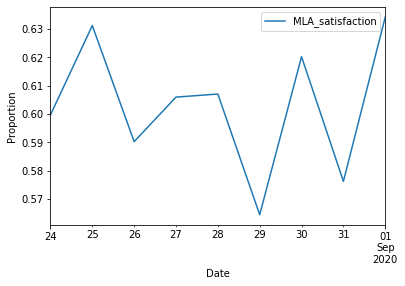

In [17]:
survey.groupby(by='collection_date')['MLA_satisfaction'].apply(lambda fd:np.sum(fd=='Fully Dissatisfied')/len(fd)).plot()
plt.xlabel('Date')
plt.ylabel('Proportion')
plt.legend(loc='best')
plt.show()

9. Create a pivot-table (or crosstab) with index as Past_Vote, Column as Vote_Now and
cell values as the count of samples

In [18]:
survey.head()

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight,age_group
0,1,2020-08-24,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969,25-40
1,2,2020-08-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419,25-40
2,3,2020-08-24,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,Male,191,Gen,0.673762,25-40
3,4,2020-08-24,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,Male,194,Gen,1.101298,25-40
4,5,2020-08-24,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505,18-25


In [19]:
pd.pivot_table(survey, index='Past_Vote', columns='Vote_Now', values='response_id', aggfunc='count')

Vote_Now,AAP,AIMIM,BJP,BSP,HAM,INC,JAP(L),JD(U),LJP,Left Front,NOTA,Others,Plurals,RJD,RJJP,RLSP,Undecided,VIP
Past_Vote,,,,,,,,,,,,,,,,,,
BJP,7.0,1.0,1630.0,3.0,5.0,42.0,101.0,110.0,44.0,13.0,194.0,32.0,87.0,370.0,88.0,24.0,62.0,10.0
BSP,NaN,1.0,2.0,5.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Did not vote,8.0,5.0,231.0,2.0,1.0,22.0,41.0,69.0,10.0,16.0,83.0,11.0,51.0,195.0,20.0,3.0,31.0,5.0
HAM,2.0,NaN,25.0,NaN,1.0,NaN,3.0,2.0,2.0,NaN,4.0,NaN,NaN,6.0,4.0,NaN,1.0,NaN
INC,NaN,6.0,6.0,NaN,NaN,57.0,10.0,9.0,NaN,3.0,6.0,3.0,3.0,100.0,1.0,2.0,7.0,NaN
JAP(L),NaN,NaN,4.0,NaN,NaN,NaN,35.0,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN
JD(U),6.0,10.0,254.0,2.0,2.0,45.0,72.0,279.0,29.0,9.0,90.0,18.0,43.0,435.0,13.0,25.0,36.0,6.0
LJP,NaN,NaN,76.0,1.0,NaN,4.0,3.0,6.0,9.0,2.0,3.0,NaN,2.0,17.0,1.0,NaN,1.0,NaN
Left Front,NaN,1.0,2.0,NaN,NaN,1.0,NaN,NaN,NaN,18.0,1.0,1.0,NaN,4.0,NaN,1.0,NaN,1.0


10.  Repeat the above question with the cell values as the sum of “weight”.

In [20]:
pd.pivot_table(survey, index='Past_Vote', columns='Vote_Now', values='weight', aggfunc='sum')

Vote_Now,AAP,AIMIM,BJP,BSP,HAM,INC,JAP(L),JD(U),LJP,Left Front,NOTA,Others,Plurals,RJD,RJJP,RLSP,Undecided,VIP
Past_Vote,,,,,,,,,,,,,,,,,,
BJP,4.807335,0.349996,1049.344112,0.452551,10.171283,50.055502,63.832368,68.029581,45.716215,7.537394,114.913686,8.790137,50.016163,250.948101,16.047570,18.715113,41.286954,18.691691
BSP,NaN,1.654731,5.174487,32.010277,NaN,2.298223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Did not vote,8.865896,5.379527,114.203906,3.329611,2.497170,27.791290,26.359190,58.983458,11.801813,13.050113,44.725179,7.289933,25.319524,173.882525,4.349832,5.041587,22.015457,10.696552
HAM,0.312607,NaN,25.348884,NaN,1.648856,NaN,0.712161,1.006719,2.496424,NaN,0.928984,NaN,NaN,7.713008,1.903148,NaN,0.039564,NaN
INC,NaN,11.105958,1.642875,NaN,NaN,161.742302,18.942597,11.077323,NaN,6.268726,5.999014,1.552038,1.588527,195.020050,5.340403,1.140299,8.558475,NaN
JAP(L),NaN,NaN,6.512846,NaN,NaN,NaN,57.876224,NaN,NaN,NaN,NaN,3.195682,NaN,2.164824,NaN,NaN,NaN,NaN
JD(U),12.457216,29.198610,156.243100,11.005903,2.639574,91.806261,106.217216,498.796862,33.148113,11.765603,61.109706,29.196072,45.175289,657.155514,4.015909,44.376194,58.137833,20.675288
LJP,NaN,NaN,85.010450,2.481377,NaN,21.613385,7.375946,11.382812,26.868529,1.712452,0.813171,NaN,1.927965,30.737989,0.478933,NaN,1.709409,NaN
Left Front,NaN,2.298223,0.209586,NaN,NaN,2.291368,NaN,NaN,NaN,44.280864,0.201455,8.309203,NaN,6.740281,NaN,0.877960,NaN,3.020887


11. Create a dataframe by performing a group by over age_group and calculate the count of
total samples under each age_group.

In [21]:
survey.groupby(by='age_group')['response_id'].agg('count')

age_group
18-25    2094
25-40    3844
40-55     801
55+       128
Name: response_id, dtype: int64

In [22]:
# creating dataframe
df1=pd.DataFrame(survey.groupby(by='age_group')['response_id'].agg('count'))
df1

,response_id
age_group,
18-25,2094
25-40,3844
40-55,801
55+,128


12. Create a dataframe by performing a group by over age_group and finding the count of
total samples for each age_group that opted for the JD(U) party in Vote_Now

In [23]:
survey.groupby(by='age_group')['Vote_Now'].apply(lambda vn:np.sum(vn=='JD(U)'))

age_group
18-25    181
25-40    264
40-55     68
55+       13
Name: Vote_Now, dtype: int64

In [24]:
# creating dataframe
df2=pd.DataFrame(survey.groupby(by='age_group')['Vote_Now'].apply(lambda vn:np.sum(vn=='JD(U)')))
df2

,Vote_Now
age_group,
18-25,181
25-40,264
40-55,68
55+,13


13. Join/Merge the two dataframes from questions 12 and 13 with the common column as age_group.

In [25]:
df=pd.merge(df1,df2,on='age_group')
df

,response_id,Vote_Now
age_group,,
18-25,2094,181
25-40,3844,264
40-55,801,68
55+,128,13


# Done

# Thank You !!

## Regards,

# Supriyo Barik